In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
number_of_files = 40

data = []
data_T = [[], [], [], [], [], [], []]

for i in range(6, number_of_files+1):
    data.append([])
    t = []
    A0 = []
    A1 = []
    A2 = []
    A3 = []
    # open_file = open(f"C:/Users/Michiel Erkamp/Desktop/Bachelor-project/data experiment 1/data-{i}.csv", 'r')
    open_file = open(f"C:/Users/Michiel/Desktop/Bachelor-project/data experiment 1/data-{i}.csv", 'r')
    for line in open_file:
        data_opgeknipt = line.split(',')
        try:
            data_opgeknipt = line.split(',')
            t.append(float(data_opgeknipt[0]))
            A0.append(float(data_opgeknipt[1]))
            A1.append(float(data_opgeknipt[2])) 
            A2.append(float(data_opgeknipt[3]))
            A3.append(float(data_opgeknipt[4]))
        except:
            if data_opgeknipt[0] == "height of setup:":
                height = round(float(data_opgeknipt[1]) - 60.05, 2)
    open_file.close()

    A_avg = np.mean(np.array([A0, A1, A2, A3]), axis=0)

    data[i-6].append([height] * len(t))
    data[i-6].append(t)
    data[i-6].append(A0)
    data[i-6].append(A1)
    data[i-6].append(A2)
    data[i-6].append(A3)
    data[i-6].append(A_avg)

    data_T[0].append([height] * len(t))
    data_T[1].append(t)
    data_T[2].append(A0)
    data_T[3].append(A1)
    data_T[4].append(A2)
    data_T[5].append(A3)
    data_T[6].append(A_avg)


data_all = [[], [], [], [], [], [], []]
for i in range(len(data_all)):
    for row in data_T[i]:
        data_all[i].extend(row)

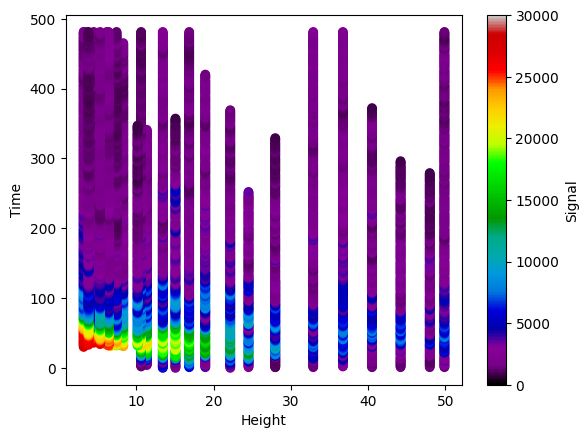

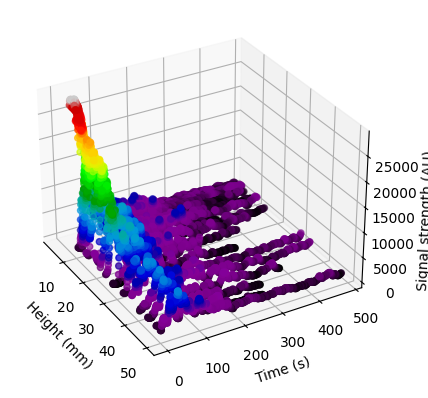

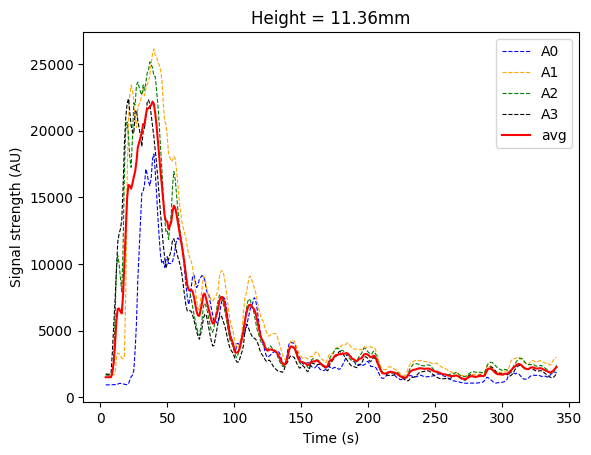

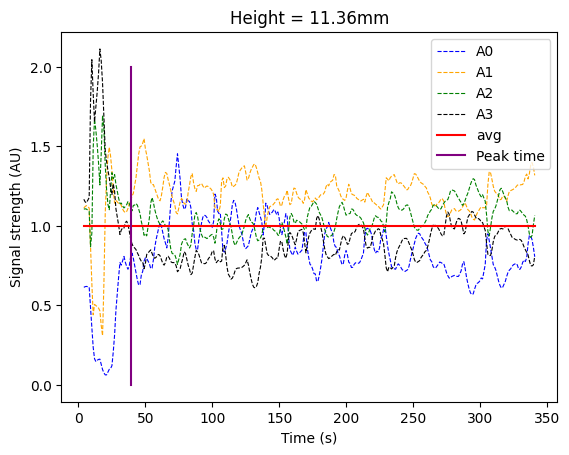

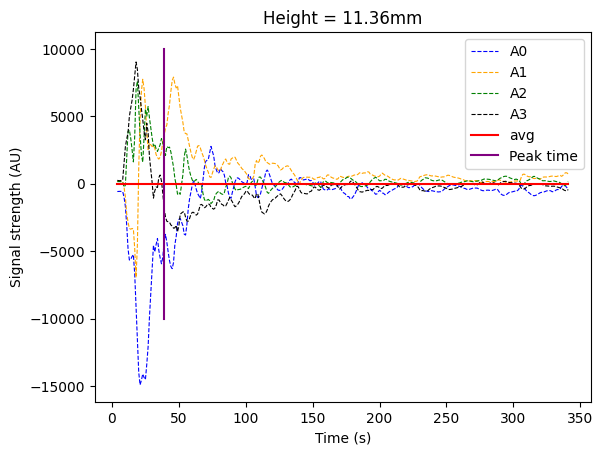

<Figure size 640x480 with 0 Axes>

In [30]:
x = data_all[0]
y = data_all[1]
z = data_all[6]

# Plotting
fig, ax = plt.subplots()
# c = ax.tricontourf(x, y, z, c=z, cmap='nipy_spectral', levels=np.linspace(0, 30000, 256), vmin=0, vmax=30000)
c = ax.scatter(x, y, c=z, cmap='nipy_spectral', vmin=0, vmax=30000)
ax.set_xlabel("Height")
ax.set_ylabel("Time")
cb = fig.colorbar(c, ax=ax, label="Signal")
cb.set_ticks(range(0,30001,5000))
plt.show()
plt.clf()
plt.clf()

ax = plt.axes(projection='3d')
# ax.set_title('all data')
# ax.plot_trisurf(x,y,z, cmap='hsv')
ax.scatter3D(x,y,z, '.', c=z, cmap='nipy_spectral') # viridis
ax.view_init(elev=30, azim=-30)
ax.set_xlabel(r'Height (mm)')
ax.set_ylabel(r'Time (s)')
ax.set_zlabel(r'Signal strength (AU)')
plt.savefig('exp1_alldata.png')
plt.show()
plt.clf()


index = np.where(data[1][6] == np.max(data[1][6]))[0][0]
peak_time = data[1][1][index]

plt.plot(data[1][1], data[1][2], color="blue", linestyle="--", linewidth=0.8, label="A0")
plt.plot(data[1][1], data[1][3], color="orange", linestyle="--", linewidth=0.8, label="A1")
plt.plot(data[1][1], data[1][4], color="green", linestyle="--", linewidth=0.8, label="A2")
plt.plot(data[1][1], data[1][5], color="black", linestyle="--", linewidth=0.8, label="A3")
plt.plot(data[1][1], data[1][6], color="red", label="avg")
# plt.plot([peak_time, peak_time], [0,np.max(data[1][6])], color="purple", label="Peak time")

plt.title(f"Height = {data[1][0][0]}mm")
plt.legend(loc='best')
plt.xlabel("Time (s)")
plt.ylabel("Signal strength (AU)")
plt.savefig('exp1_rawdata.png')
plt.show()
plt.clf()

plt.plot(data[1][1], np.array(data[1][2]) / np.array(data[1][6]), color="blue", linestyle="--", linewidth=0.8, label="A0")
plt.plot(data[1][1], np.array(data[1][3]) / np.array(data[1][6]), color="orange", linestyle="--", linewidth=0.8, label="A1")
plt.plot(data[1][1], np.array(data[1][4]) / np.array(data[1][6]), color="green", linestyle="--", linewidth=0.8, label="A2")
plt.plot(data[1][1], np.array(data[1][5]) / np.array(data[1][6]), color="black", linestyle="--", linewidth=0.8, label="A3")
plt.plot(data[1][1], np.array(data[1][6]) / np.array(data[1][6]), color="red", label="avg")
plt.plot([peak_time, peak_time], [0,2], color="purple", label="Peak time")

plt.title(f"Height = {data[1][0][0]}mm")
plt.legend(loc='best')
plt.xlabel("Time (s)")
plt.ylabel("Signal strength (AU)")
plt.show()
plt.clf()

plt.plot(data[1][1], np.array(data[1][2]) - np.array(data[1][6]), color="blue", linestyle="--", linewidth=0.8, label="A0")
plt.plot(data[1][1], np.array(data[1][3]) - np.array(data[1][6]), color="orange", linestyle="--", linewidth=0.8, label="A1")
plt.plot(data[1][1], np.array(data[1][4]) - np.array(data[1][6]), color="green", linestyle="--", linewidth=0.8, label="A2")
plt.plot(data[1][1], np.array(data[1][5]) - np.array(data[1][6]), color="black", linestyle="--", linewidth=0.8, label="A3")
plt.plot(data[1][1], np.array(data[1][6]) - np.array(data[1][6]), color="red", label="avg")
plt.plot([peak_time, peak_time], [-10000,10000], color="purple", label="Peak time")

plt.title(f"Height = {data[1][0][0]}mm")
plt.legend(loc='best')
plt.xlabel("Time (s)")
plt.ylabel("Signal strength (AU)")
plt.show()
plt.clf()

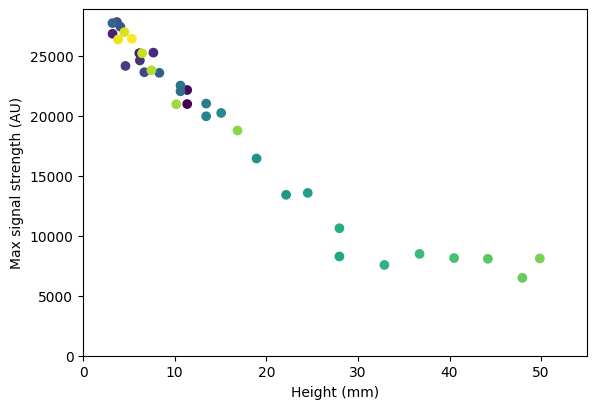

In [31]:
x = []
y = []

for i in range(len(data)):
    x.append(data[i][0][0])
    y.append(np.max(data[i][6]))

height_top_old = x
signal_top_old = y

plt.figure(figsize=(6.5, 4.5))
plt.scatter(x, y, c=range(5,number_of_files), cmap='viridis')
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.xlabel("Height (mm)")
plt.ylabel("Max signal strength (AU)")
plt.show()

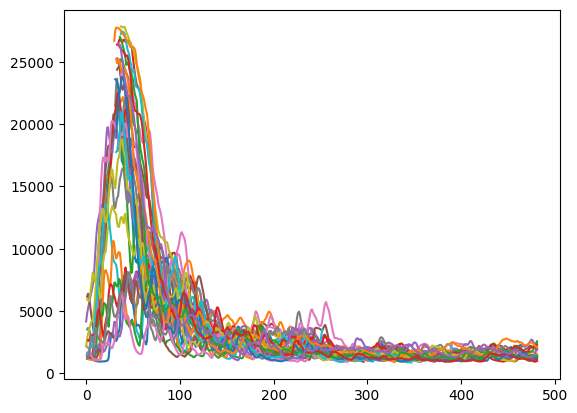

<Figure size 640x480 with 0 Axes>

In [32]:
for i in range(len(data)):
    x = data[1]
    y = data[6]
    plt.plot(data[i][1], data[i][6])

plt.show()
plt.clf()

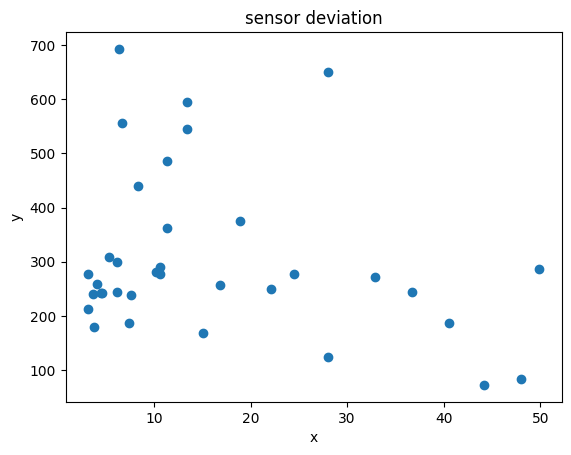

<Figure size 640x480 with 0 Axes>

In [33]:
x = []
y = []
sensor_baselines = []
sensor_deviations1 = []

for i in range(len(data)):
    data_i = np.array(data[i])
    A_all = data_i[2:6]
    sensor_avg = np.mean(A_all, axis=1)
    sensor_baseline = np.mean(A_all[:,-60:], axis=1)
    sensor_baselines.append(sensor_baseline)
    sensor_deviation = np.std(sensor_baseline)
    sensor_deviations1.append(sensor_deviation)

    x.append(data_i[0,0])
    y.append(sensor_deviation)


plt.scatter(x, y)
plt.title("sensor deviation")
# plt.xlim(0,55)
# plt.ylim(bottom=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()

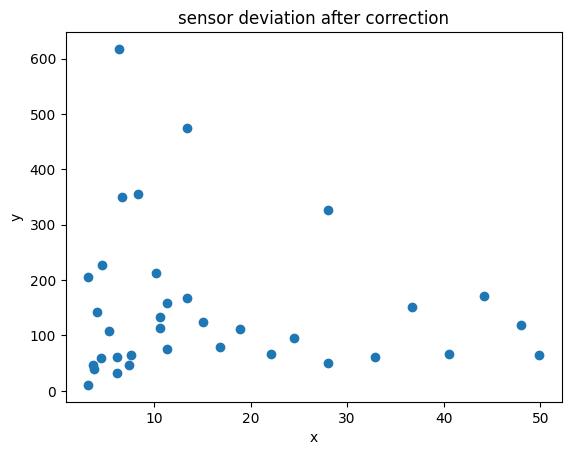

<Figure size 640x480 with 0 Axes>

In [34]:
sensor_baseline_avg = np.mean(sensor_baselines, axis=0)
sensor_baseline_std = np.std(sensor_baselines, axis=0)
sensor_baseline_min = np.min(sensor_baselines, axis=0)
sensor_baseline_max = np.max(sensor_baselines, axis=0)

factor = np.mean(sensor_baseline_avg)

x = []
y = []
sensor_deviations2 = []

for i in range(len(data)):
    data_i = np.array(data[i])
    A_all = data_i[2:6]
    corrected_A = []
    for j in range(len(sensor_baseline_avg)):
        corrected_A.append(np.array(A_all[j]) / sensor_baseline_avg[j])
    corrected_A = np.array(corrected_A)
    sensor_avg = np.mean(corrected_A, axis=1)
    sensor_baseline = np.mean(corrected_A[:,-60:], axis=1)
    sensor_deviation = np.std(sensor_baseline) * factor
    sensor_deviations2.append(sensor_deviation)

    x.append(data_i[0,0])
    y.append(sensor_deviation)
    # x.append([data_i[0,0],data_i[0,0],data_i[0,0],data_i[0,0]])
    # y.append(sensor_baseline)

plt.scatter(x, y)
plt.title("sensor deviation after correction")
# plt.xlim(0,55)
# plt.ylim(bottom=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()

In [ ]:
print(np.mean(sensor_deviations1))
print(np.mean(sensor_deviations2))

print(sensor_baseline_avg)

print(sensor_baseline_std)
print(sensor_baseline_avg + 3*sensor_baseline_std)
print(sensor_baseline_max)


305.86076505205637
148.4346506832295
[1322.67380952 2030.19       1909.04761905 1737.30761905]
[627.02167805 901.70370483 752.41198174 721.77626516]
[3203.73884369 4735.30111449 4166.28356428 3902.63641451]
[4229.16666667 5948.45       5336.65       4695.56666667]


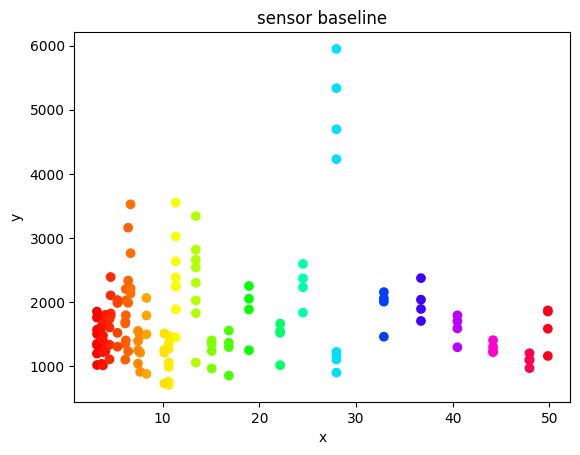

[1322.67380952 2030.19       1909.04761905 1737.30761905]


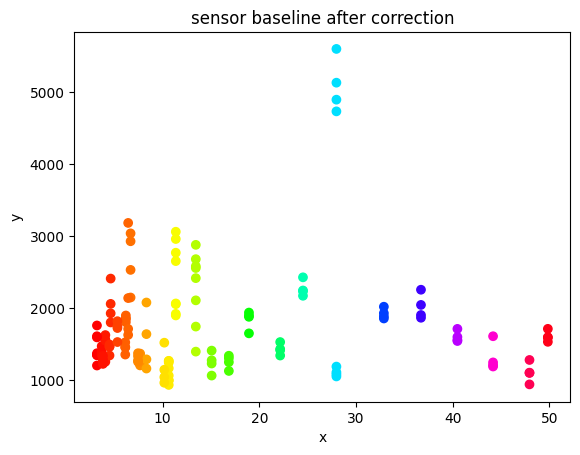

<Figure size 640x480 with 0 Axes>

In [36]:
x = []
y = []

for i in range(len(data)):
    data_i = np.array(data[i])
    A_all = data_i[2:6]
    corrected_A = []
    for j in range(len(sensor_baseline_avg)):
        corrected_A.append(np.array(A_all[j]) / sensor_baseline_avg[j] * factor)
    corrected_A = np.array(corrected_A)
    sensor_avg = np.mean(corrected_A, axis=1)
    sensor_baseline = np.mean(A_all[:,-60:], axis=1)
    sensor_baseline_corr = np.mean(corrected_A[:,-60:], axis=1)

    x.append([data_i[0,0],data_i[0,0],data_i[0,0],data_i[0,0]])
    y.append(sensor_baseline)

plt.scatter(x, y, c=x, cmap='hsv')
plt.title("sensor baseline")
# plt.xlim(0,55)
# plt.ylim(bottom=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()

x = []
y = []

for i in range(len(data)):
    data_i = np.array(data[i])
    A_all = data_i[2:6]
    corrected_A = []
    for j in range(len(sensor_baseline_avg)):
        corrected_A.append(np.array(A_all[j]) / sensor_baseline_avg[j] * factor)
    corrected_A = np.array(corrected_A)
    sensor_avg = np.mean(corrected_A, axis=1)
    sensor_baseline = np.mean(A_all[:,-60:], axis=1)
    sensor_baseline_corr = np.mean(corrected_A[:,-60:], axis=1)

    x.append([data_i[0,0],data_i[0,0],data_i[0,0],data_i[0,0]])
    y.append(sensor_baseline_corr)

print(sensor_baseline_avg)

plt.scatter(x, y, c=x, cmap='hsv')
plt.title("sensor baseline after correction")
# plt.xlim(0,55)
# plt.ylim(bottom=0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.clf()

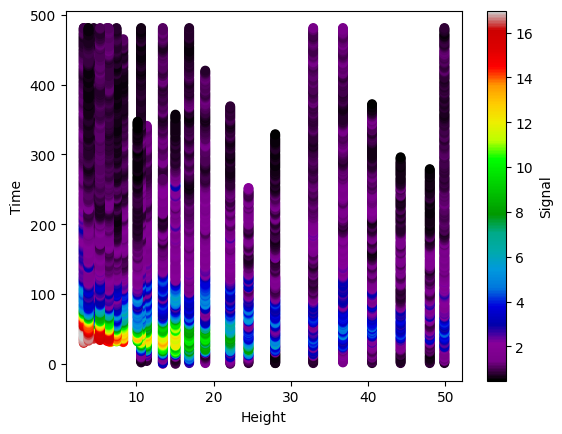

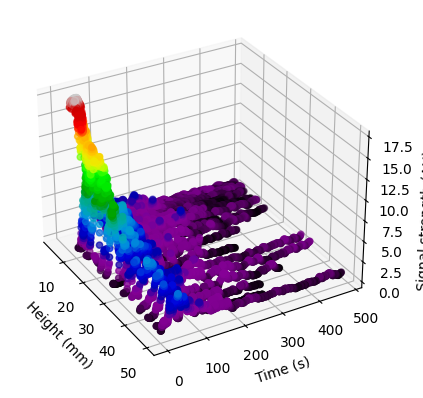

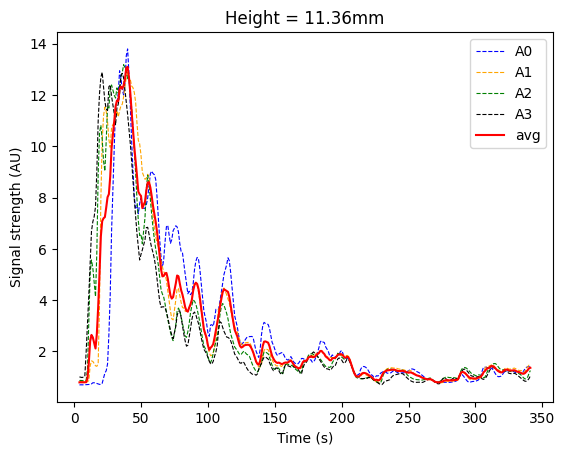

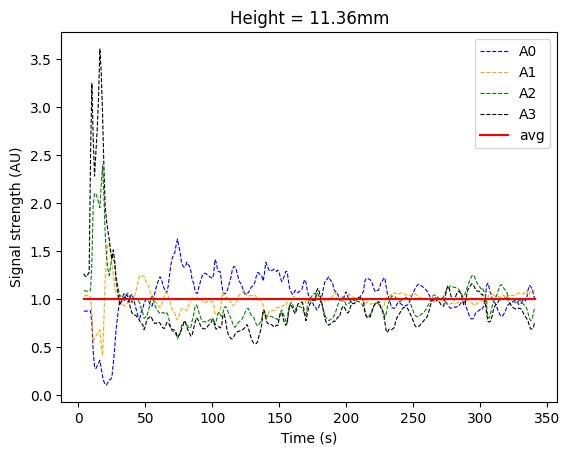

<Figure size 640x480 with 0 Axes>

In [37]:
for i in range(len(data)):
    for j in range(2, 6):
        for k in range(len(data[i][j])):
            data[i][j][k] /= sensor_baseline_avg[j-2]

x = []
y = []
z = []

for i in range(len(data)):
    A_avg = np.mean(np.array(data[i][2:5]), axis=0)
    data[i][6] = A_avg
    x.extend(data[i][0])
    y.extend(data[i][1])
    z.extend(data[i][6])

# Plotting
fig, ax = plt.subplots()
# c = ax.tricontourf(x, y, z, c=z, cmap='nipy_spectral', levels=np.linspace(0, 30000, 256), vmin=0, vmax=30000)
c = ax.scatter(x, y, c=z, cmap='nipy_spectral')
ax.set_xlabel("Height")
ax.set_ylabel("Time")
cb = fig.colorbar(c, ax=ax, label="Signal")
# cb.set_ticks(range(0,30001,5000))
plt.show()
plt.clf()
plt.clf()

ax = plt.axes(projection='3d')
# ax.set_title('all data')
# ax.plot_trisurf(x,y,z, cmap='hsv')
ax.scatter3D(x,y,z, '.', c=z, cmap='nipy_spectral') # viridis
ax.view_init(elev=30, azim=-30)
ax.set_xlabel(r'Height (mm)')
ax.set_ylabel(r'Time (s)')
ax.set_zlabel(r'Signal strength (AU)')
plt.savefig('exp1_alldata_corrected.png')
plt.show()
plt.clf()

plt.plot(data[1][1], data[1][2], color="blue", linestyle="--", linewidth=0.8, label="A0")
plt.plot(data[1][1], data[1][3], color="orange", linestyle="--", linewidth=0.8, label="A1")
plt.plot(data[1][1], data[1][4], color="green", linestyle="--", linewidth=0.8, label="A2")
plt.plot(data[1][1], data[1][5], color="black", linestyle="--", linewidth=0.8, label="A3")
plt.plot(data[1][1], data[1][6], color="red", label="avg")

plt.title(f"Height = {data[1][0][0]}mm")
plt.legend(loc='best')
plt.xlabel("Time (s)")
plt.ylabel("Signal strength (AU)")
plt.savefig('exp1_rawdata_corrected.png')
plt.show()
plt.clf()

plt.plot(data[1][1], np.array(data[1][2]) / np.array(data[1][6]), color="blue", linestyle="--", linewidth=0.8, label="A0")
plt.plot(data[1][1], np.array(data[1][3]) / np.array(data[1][6]), color="orange", linestyle="--", linewidth=0.8, label="A1")
plt.plot(data[1][1], np.array(data[1][4]) / np.array(data[1][6]), color="green", linestyle="--", linewidth=0.8, label="A2")
plt.plot(data[1][1], np.array(data[1][5]) / np.array(data[1][6]), color="black", linestyle="--", linewidth=0.8, label="A3")
plt.plot(data[1][1], np.array(data[1][6]) / np.array(data[1][6]), color="red", label="avg")

plt.title(f"Height = {data[1][0][0]}mm")
plt.legend(loc='best')
plt.xlabel("Time (s)")
plt.ylabel("Signal strength (AU)")
plt.show()
plt.clf()

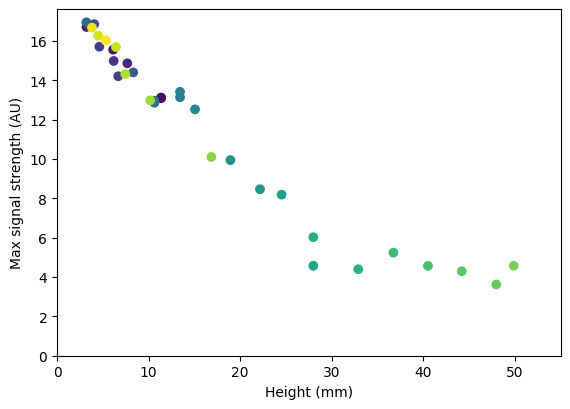

In [38]:
x = []
y = []

for i in range(len(data)):
    x.append(data[i][0][0])
    y.append(np.max(data[i][6]))

plt.figure(figsize=(6.5, 4.5))
plt.scatter(x, y, c=range(5,number_of_files), cmap='viridis')
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.xlabel("Height (mm)")
plt.ylabel("Max signal strength (AU)")
plt.show()

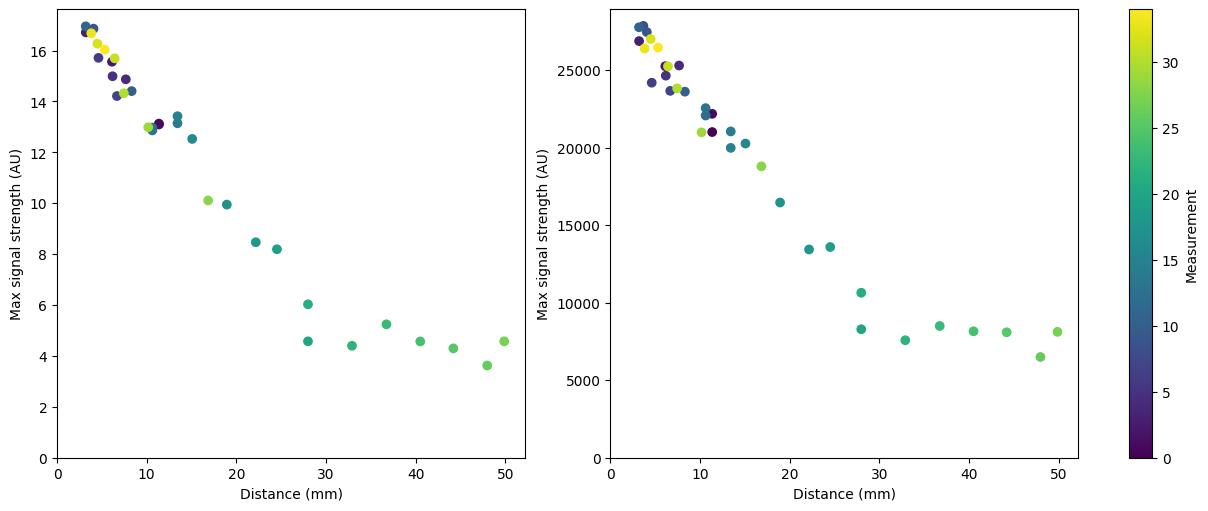

<Figure size 640x480 with 0 Axes>

In [39]:
height_top = []
time_top = []
signal_top = []


for measurement in data:
    index = np.where(measurement[6] == np.max(measurement[6]))[0][0]
    height_top.append(measurement[0][index])
    time_top.append(measurement[1][index])
    signal_top.append(measurement[6][index])

# Create side-by-side subplots with equal width
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Plot on the left
sc = axes[0].scatter(height_top, signal_top, c=range(0, number_of_files-5), cmap='viridis')
# axes[0].plot([0,150], [1000,1000])
axes[0].set_xlim(left=0)
axes[0].set_ylim(bottom=0)
axes[0].set_xlabel("Distance (mm)")
axes[0].set_ylabel("Max signal strength (AU)")

# Plot on the right
axes[1].scatter(height_top_old, signal_top_old, c=range(0, number_of_files-5), cmap='viridis')
axes[1].set_xlim(left=0)
axes[1].set_ylim(bottom=0)
axes[1].set_xlabel("Distance (mm)")
axes[1].set_ylabel("Max signal strength (AU)")

# Add a shared colorbar on the right side
cbar = fig.colorbar(sc, ax=axes, location='right', label='Measurement')

plt.show()
plt.clf()